In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import nltk
import pickle
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:

data = pd.read_csv(('dataset_final_preprocessed.csv'),encoding = "ISO-8859-1")
print(data.shape)
data.head()
print(data['sentiment'].unique())

(208044, 2)
['Happy' 'Sad' 'Fear' 'Anger' 'Bad' 'Surprise' 'Digust']


In [3]:
from sklearn.model_selection import train_test_split
data = data.fillna(' ')
train_data , test_data = train_test_split(data,test_size=0.20)
print(train_data.shape)
print(train_data.head())

(166435, 2)
                                                  content sentiment
56933                       im not feel happi thank today     Happy
90361   feel like live weird limin space right  like f...      Fear
54019                                          im not sad       Sad
150139  aesthet pleas imagin aesthet pleas would jk as...       Sad
10617             realli feel like much mayb someth gentl     Happy


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(token_pattern = r"(?u)\b\w+\b")

X_train = cv.fit_transform(data["content"])
encoded = cv.vocabulary_

In [5]:
data1 = data.copy()
new_datacon=[]
for i in data1['content']:
  k=[]
  for j in i:
    try :
      k.append(encoded[j])
    except:
      continue
  new_datacon.append(k)
data1['content']= new_datacon
print(data1.head())
print(len(data1['sentiment']))

                                             content sentiment
0  [93942, 30363, 59936, 73125, 93942, 33675, 461...     Happy
1  [103531, 70783, 100380, 55445, 24977, 55445, 7...     Happy
2  [41654, 30363, 4692, 79231, 93942, 10959, 7923...       Sad
3  [73125, 30363, 79231, 33675, 30363, 17547, 939...     Happy
4  [24977, 4692, 59936, 67227, 30363, 33675, 3367...      Fear
208044


In [6]:
import numpy as np
from keras.utils import to_categorical
cats = data1['sentiment']
### Universal list of colors
total_cats = data['sentiment'].unique()

print(total_cats)

### map each color to an integer
mapping = {}
for x in range(len(total_cats)):
  mapping[total_cats[x]] = x

# integer representation
for x in range(len(cats)):
  cats[x] = mapping[cats[x]]

onehotencoded = to_categorical(cats)
print(onehotencoded)
data1['sentiment'] = onehotencoded
print(data1['sentiment'])

Using TensorFlow backend.


['Happy' 'Sad' 'Fear' 'Anger' 'Bad' 'Surprise' 'Digust']
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
0         1.0
1         1.0
2         0.0
3         1.0
4         0.0
         ... 
208039    1.0
208040    1.0
208041    0.0
208042    0.0
208043    0.0
Name: sentiment, Length: 208044, dtype: float32


In [7]:
print(data1.head())

                                             content  sentiment
0  [93942, 30363, 59936, 73125, 93942, 33675, 461...        1.0
1  [103531, 70783, 100380, 55445, 24977, 55445, 7...        1.0
2  [41654, 30363, 4692, 79231, 93942, 10959, 7923...        0.0
3  [73125, 30363, 79231, 33675, 30363, 17547, 939...        1.0
4  [24977, 4692, 59936, 67227, 30363, 33675, 3367...        0.0


In [8]:
train_data1 , test_data1 = train_test_split(data1,test_size=0.20)
print(train_data1.shape)
print(train_data1.head())

(166435, 2)
                                                  content  sentiment
194955  [107635, 30363, 73125, 10959, 70783, 24977, 46...        0.0
193072  [33675, 30363, 30363, 55445, 33675, 46151, 672...        1.0
19246   [67227, 4692, 59936, 30363, 33675, 30363, 3036...        1.0
94719   [10959, 70783, 70783, 52408, 17547, 70783, 102...        0.0
121341  [59936, 70783, 59936, 10959, 30363, 67227, 109...        0.0


In [9]:
#encoder = OneHotEncoder(handle_unknown='ignore')
#train_data1['sentiment']=(encoder.fit_transform(train_data1[['sentiment']]).toarray())
print(train_data1.head())

                                                  content  sentiment
194955  [107635, 30363, 73125, 10959, 70783, 24977, 46...        0.0
193072  [33675, 30363, 30363, 55445, 33675, 46151, 672...        1.0
19246   [67227, 4692, 59936, 30363, 33675, 30363, 3036...        1.0
94719   [10959, 70783, 70783, 52408, 17547, 70783, 102...        0.0
121341  [59936, 70783, 59936, 10959, 30363, 67227, 109...        0.0


#Soumya Dip Mal

In [10]:
 print(new_datacon[0])
 print(len(new_datacon))
 print(encoded['content'])

[93942, 30363, 59936, 73125, 93942, 33675, 46151, 79231, 83418, 93942, 67227, 4692, 59936, 30363, 70783, 67227, 30363, 59936, 4692, 67227, 46151, 73125, 79231, 70783, 49417, 30363, 17547, 93942, 4692, 79231, 17547, 41654, 24977, 46151, 70783, 17547, 30363, 83418, 100380, 67227, 24977, 30363, 79231, 103531, 4692, 107635, 33675, 30363, 30363, 55445, 73125, 4692, 83418, 83418, 46151, 70783, 67227, 55445, 46151, 52408, 30363, 79231, 30363, 83418, 93942, 70783, 79231, 83418, 4692, 46151, 67227, 93942, 73125, 4692, 93942, 79231, 46151, 17547, 52408, 17547, 4692, 93942, 41654, 30363, 24977, 79231, 83418, 93942, 79231, 4692, 93942, 30363, 37989, 73125, 55445, 4692, 67227, 30363, 107209, 17547, 30363, 55445, 17547, 4692, 93942, 41654, 70783, 55445, 83418, 17547, 41654, 70783, 70783, 55445]
208044
22787


In [11]:
encoded = {k:(v+3) for k,v in encoded.items()}
encoded["<PAD>"]= 0
encoded["<START>"]= 1
encoded["<UNK>"] = 2
encoded["<UNUSED>"] = 3


In [12]:
reverse_word_index = dict([(value,key) for key,value in encoded.items()])

train_data1['content'] = keras.preprocessing.sequence.pad_sequences(train_data1['content'],value=encoded["<PAD>"],padding="post",maxlen=512)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
pickle.dump(cv.vocabulary_,open("feature1.pkl","wb"))

In [14]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv1D,Flatten
from keras.layers import Embedding

"""Prediction class label encoding
For the deep learning models we use the one-hot encoding to change the sentiment labels to numeric representations.
"""

le = LabelEncoder()
num_classes=13 
# encode train labels
y_tr = le.fit_transform(train_data1["sentiment"])
y_train = keras.utils.to_categorical(y_tr, num_classes)
# encode test labels
y_ts = le.fit_transform(test_data1["sentiment"])
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [15]:
model = keras.Sequential()
model.add(keras.layers.Embedding(len(encoded),64))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(128,activation="softmax"))
model.add(keras.layers.Dense(1))

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
x_val= train_data1['content'][:10000]
x_train= train_data1['content'][10000:]

y_val= train_data1['sentiment'][:10000]
y_train= train_data1['sentiment'][10000:]

#fitmodel = model.fit(x_train,y_train,epochs=40,batch_size=512,verbose=1)
print(len(x_train))
print(len(y_train))

156435
156435


In [18]:
model.fit(x_train,y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val),verbose=1)


Train on 156435 samples, validate on 10000 samples
Epoch 1/4
156435/156435 [==============================] - 50s 319us/step - loss: 0.4833 - acc: 0.8145 - val_loss: 0.4764 - val_acc: 0.8121
Epoch 2/4
156435/156435 [==============================] - 49s 314us/step - loss: 0.4716 - acc: 0.8145 - val_loss: 0.4766 - val_acc: 0.8121
Epoch 3/4
156435/156435 [==============================] - 49s 314us/step - loss: 0.4716 - acc: 0.8145 - val_loss: 0.4767 - val_acc: 0.8121
Epoch 4/4
156435/156435 [==============================] - 48s 310us/step - loss: 0.4715 - acc: 0.8145 - val_loss: 0.4768 - val_acc: 0.8121


In [19]:
y_pred=model.predict(x_val)

In [20]:
model.save('final31.h5')

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return fig, ax

In [23]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return fig, ax

def get_metrics(test_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(test_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(test_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(test_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(test_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        
def display_confusion_matrix(test_labels, predicted_labels,classes):
    cm = confusion_matrix(test_labels,predicted_labels)
    np.set_printoptions(precision=2)
    print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def display_classification_report(test_labels, predicted_labels, classes):

    report = metrics.classification_report(y_true=test_labels, y_pred=predicted_labels) 
    print(report)
    
      
def display_model_performance_metrics(classifier,x_data,test_labels, classes):
    predicted_labels = classifier.predict(x_data)
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(test_labels, predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(test_labels, predicted_labels,classes)
    fig, ax = plot_confusion_matrix(test_labels, predicted_labels, classes, normalize=True)
    fig.set_size_inches(18.5, 10.5)

In [24]:
data_classes = list(data['sentiment'].unique())
data_classes = np.array(data_classes)
data_classes

array(['Happy', 'Sad', 'Fear', 'Anger', 'Bad', 'Surprise', 'Digust'],
      dtype='<U8')

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
cv = CountVectorizer()
x_data = cv.fit_transform(data['content'].values.astype('U'))

y_data = data['sentiment'].values.astype('U')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20, random_state=42)

from sklearn.linear_model import SGDClassifier 
clf = SGDClassifier(loss='hinge')
clf.fit(x_train,y_train)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Model Performance metrics:
------------------------------
Accuracy: 0.8496
Precision: 0.8422
Recall: 0.8496
F1 Score: 0.8412

Model Classification report:
------------------------------
              precision    recall  f1-score   support

       Anger       0.72      0.62      0.67      1459
         Bad       0.40      0.18      0.25      1810
      Digust       0.57      0.36      0.44       206
        Fear       0.93      0.87      0.90     12716
       Happy       0.72      0.90      0.80      7672
         Sad       0.90      0.93      0.92     16902
    Surprise       0.61      0.39      0.47       844

    accuracy                           0.85     41609
   macro avg       0.69      0.61      0.64     41609
weighted avg       0.84      0.85      0.84     41609

Normalized confusion matrix


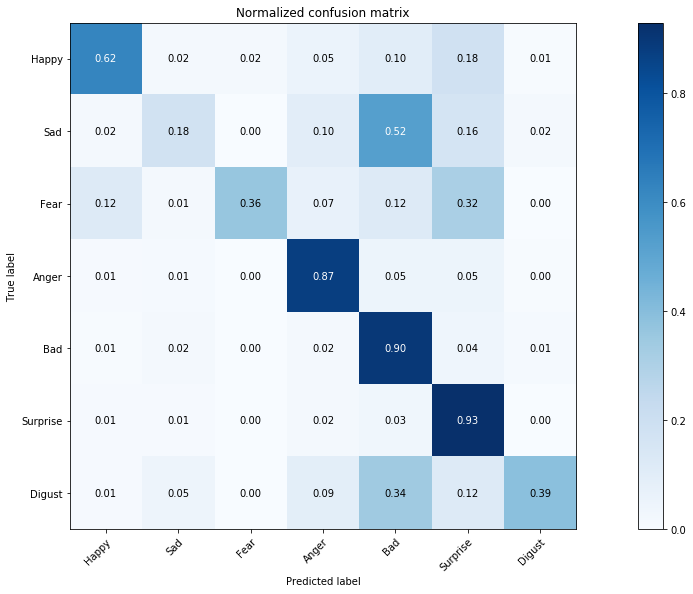

In [26]:
predicted_labels = clf.predict(x_test)
display_model_performance_metrics(clf,x_test,y_test, data_classes)

In [27]:

from keras.models import load_model
from flask import Flask,request,jsonify,render_template
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
c=[]
cv = pickle.load(open('feature1.pkl', 'rb'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:

#model=load_model('final3.h5')